#### 10.1.a

Create a tokenize function that splits a sentence into words. Ensure that your tokenizer removes basic punctuation

In [35]:
from string import punctuation
import string
import re

In [36]:
my_sent = "Hi, my name is Adam. This is #1 MY SENTENCE! This is something I think is important. Don't miss out"

In [37]:
def tokenize(text):
    #remove punct and apply stemming and lower case all text
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '').lower()
    # replace num with char
    pattern = re.compile(r'((?<!\d)\d(?!\d))')
    text=pattern.sub('one',text)
    print('punct stripped')
    print(text)
    # add to a list
    words = text.split()
    text = [w.translate(words) for w in words]
    return text

token = tokenize(my_sent)

punct stripped
hi my name is adam this is one my sentence this is something i think is important dont miss out


#### Assignment 10.1.b

In [40]:
#pip install nltk
import nltk

In [41]:
def ngram(s, n):
    bi_grams = nltk.ngrams(tokenize(s), n)
#     print(bi_grams)
    return bi_grams

grams = ngram(my_sent, 3)
list(zip(grams))

punct stripped
hi my name is adam this is one my sentence this is something i think is important dont miss out


[(('hi', 'my', 'name'),),
 (('my', 'name', 'is'),),
 (('name', 'is', 'adam'),),
 (('is', 'adam', 'this'),),
 (('adam', 'this', 'is'),),
 (('this', 'is', 'one'),),
 (('is', 'one', 'my'),),
 (('one', 'my', 'sentence'),),
 (('my', 'sentence', 'this'),),
 (('sentence', 'this', 'is'),),
 (('this', 'is', 'something'),),
 (('is', 'something', 'i'),),
 (('something', 'i', 'think'),),
 (('i', 'think', 'is'),),
 (('think', 'is', 'important'),),
 (('is', 'important', 'dont'),),
 (('important', 'dont', 'miss'),),
 (('dont', 'miss', 'out'),)]

#### Assignment 10.1.c

In [42]:
import pandas as pd

def one_hot_encode(tokens):
    df = pd.DataFrame(tokens,columns=['n_gram'])
    df_one_hot = pd.concat([df,pd.get_dummies(df['n_gram'])],axis=1)
    return df_one_hot


one_hot_encode(token)

,n_gram,adam,dont,hi,i,important,is,miss,my,name,one,out,sentence,something,think,this
0,hi,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,my,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,name,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,is,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,adam,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,this,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,is,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
7,one,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8,my,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9,sentence,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


#### 10.2
Using listings 6.16, 6.17, and 6.18 in Deep Learning with Python as a guide, train a sequential model with embeddings on the IMDB data found in data/external/imdb/. Produce the model performance metrics and training and validation accuracy curves within the Jupyter notebook.

In [43]:
from keras.layers import Embedding

# The Embedding layer takes at least two arguments:
# the number of possible tokens, here 1000 (1 + maximum word index),
# and the dimensionality of the embeddings, here 64.
embedding_layer = Embedding(1000, 64)

In [44]:
from keras.datasets import imdb
from keras import preprocessing

# Number of words to consider as features
max_features = 10000
# Cut texts after this number of words 
# (among top max_features most common words)
maxlen = 20

# Load the data as lists of integers.
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# This turns our lists of integers
# into a 2D integer tensor of shape `(samples, maxlen)`
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do t

In [45]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
# We specify the maximum input length to our Embedding layer
# so we can later flatten the embedded inputs
model.add(Embedding(10000, 8, input_length=maxlen))
# After the Embedding layer, 
# our activations have shape `(samples, maxlen, 8)`.

# We flatten the 3D tensor of embeddings 
# into a 2D tensor of shape `(samples, maxlen * 8)`
model.add(Flatten())

# We add the classifier on top
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_2 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 2s 2ms/step - loss: 0.6879 - acc: 0.5498 - val_loss: 0.6307 - val_acc: 0.6896
Epoch 2/10
625/625 [==============================] - 1s 2ms/step - loss: 0.5831 - acc: 0.7388 - val_loss: 0.5333 - val_acc: 0.7282
Epoch 3/10
625/625 [==============================] - 1s 2ms/step - loss: 0.4743 - acc: 0.7832 - val_loss: 0.5038 - 

In [46]:
import os

imdb_dir = '/home/jovyan/dsc650/data/external/imdb/aclImdb/'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [47]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100  # We will cut reviews after 100 words
training_samples = 200  # We will be training on 200 samples
validation_samples = 10000  # We will be validating on 10000 samples
max_words = 10000  # We will only consider the top 10,000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Split the data into a training set and a validation set
# But first, shuffle the data, since we started from data
# where sample are ordered (all negative first, then all positive).
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 88582 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


In [48]:

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_3 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
7/7 [==============================] - 1s 130ms/step - loss: 0.6968 - acc: 0.4253 - val_loss: 0.6922 - val_acc: 0.5159
Epoch 2/10
7/7 [==============================] - 1s 115ms/step - loss: 0.4991 - acc: 1.0000 - val_loss: 0.6968 

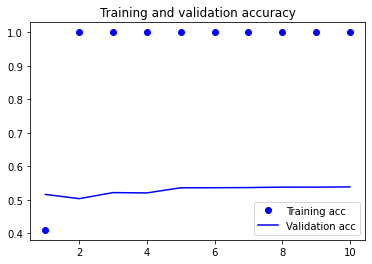

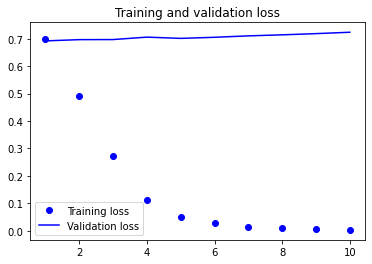

In [49]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [50]:
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [51]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.7196 - acc: 0.5402


[0.7195565104484558, 0.5401999950408936]

#### 10.3
Using listing 6.27 in Deep Learning with Python as a guide, fit the same data with an LSTM layer. Produce the model performance metrics and training and validation accuracy curves within the Jupyter notebook.

In [52]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
2/2 [==============================] - 2s 881ms/step - loss: 0.6939 - acc: 0.4266 - val_loss: 0.6918 - val_acc: 0.5250
Epoch 2/10
2/2 [==============================] - 0s 134ms/step - loss: 0.6873 - acc: 0.8380 - val_loss: 0.6926 - val_acc: 0.5000
Epoch 3/10
2/2 [==============================] - 0s 121ms/step - loss: 0.6809 - acc: 0.7948 - val_loss: 0.6931 - val_acc: 0.4500
Epoch 4/10
2/2 [==============================] - 0s 130ms/step - loss: 0.6726 - acc: 0.8667 - val_loss: 0.6932 - val_acc: 0.4500
Epoch 5/10
2/2 [==============================] - 0s 130ms/step - loss: 0.6600 - acc: 0.8557 - val_loss: 0.6914 - val_acc: 0.4250
Epoch 6/10
2/2 [==============================] - 0s 135ms/step - loss: 0.6435 - acc: 0.9594 - val_loss: 0.6952 - val_acc: 0.4250
Epoch 7/10
2/2 [==============================] - 0s 136ms/step - loss: 0.6095 - acc: 0.8531 - val_loss: 0.7363 - val_acc: 0.4250
Epoch 8/10
2/2 [==============================] - 0s 140ms/step - loss: 0.5389 - acc: 0.68

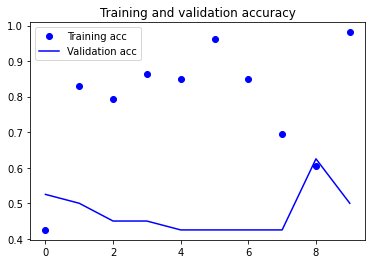

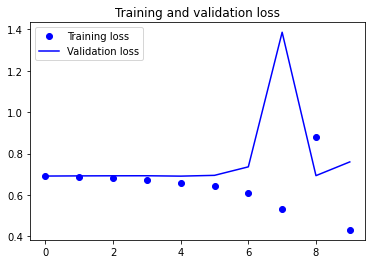

In [53]:

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### 10.4
Using listing 6.46 in Deep Learning with Python as a guide, fit the same data with a simple 1D convnet. Produce the model performance metrics and training and validation accuracy curves within the Jupyter notebook.

In [57]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 20000   # number of words to consider as features
max_len = 500  # cut texts after this number of words (among top max_features most common words)
max_words=10000
# print('Loading data...')
# (x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
# print(len(x_train), 'train sequences')
# print(len(x_test), 'test sequences')

# print('Pad sequences (samples x time)')
# x_train = sequence.pad_sequences(x_train, maxlen=max_len)
# x_test = sequence.pad_sequences(x_test, maxlen=max_len)
# print('x_train shape:', x_train.shape)
# print('x_test shape:', x_test.shape)

In [58]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

model.summary()

model.compile(optimizer=RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 500, 128)          2560000   
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 98, 32)            0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 32)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 2,595,937
Trainable params: 2,595,937
Non-trainable params: 0
___________________________________________

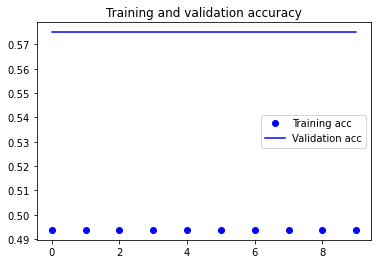

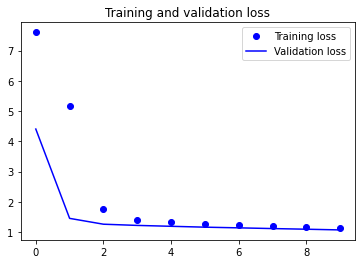

In [59]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()